In [1]:
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plot_params as pp

In [2]:
pp.fonts()

('sans-serif', 'Arial', 18)

In [3]:
RE = "/wynton/group/ahituv/fongsl/projects/EMF/results/ATAC/WTC11NGN2.1"

DESEQ2 = os.path.join(RE,"deseq2.csv")
DESEQ2_ANNO= os.path.join(RE, "deseq2_peakAnno.csv")

In [4]:
df= pd.read_csv(DESEQ2)
dfan= pd.read_csv(DESEQ2_ANNO)
df.head()

,seqnames,start,end,width,strand,Conc,Conc_treatment,Conc_control,Fold,p.value,FDR
0,chrUn_KI270438v1,111952,112352,401,*,7.357731,6.624322,7.972544,-1.214511,3.256816e-20,3.148592e-15
1,chrUn_KI270438v1,103862,104262,401,*,7.839601,7.167267,8.421366,-1.133705,6.511158e-18,3.147396e-13
2,chrUn_KI270438v1,109645,110045,401,*,8.454686,7.833144,9.007258,-1.065798,9.655106e-17,3.111422e-12
3,chrUn_KI270467v1,2884,3284,401,*,7.891754,7.277803,8.439822,-1.054885,1.444081e-16,3.490235e-12
4,chr16,46387732,46388132,401,*,7.175529,6.472632,7.774100,-1.136309,6.459160e-15,1.248904e-10


In [5]:
dfan.head()

,seqnames,start,end,width,strand,Conc,Conc_treatment,Conc_control,Fold,p.value,...,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
0,chr16,46387732,46388132,401,*,7.175529,6.472632,7.774100,-1.136309,6.459160e-15,...,46474122,46478439,4318,2,124149,ENST00000571606.1,90307,NaN,ANKRD26P1,ankyrin repeat domain 26 pseudogene 1
1,chr16,3500746,3501146,401,*,7.851914,8.232570,7.108733,0.989900,2.472905e-12,...,3500976,3515551,14576,1,23059,ENST00000573370.5,0,ENSG00000103351,CLUAP1,clusterin associated protein 1
2,chr5,132556759,132557159,401,*,8.081537,8.426384,7.437630,0.886984,1.668315e-11,...,132556930,132591985,35056,1,10111,ENST00000651541.1,0,ENSG00000113522,RAD50,RAD50 double strand break repair protein
3,chr22_KI270733v1_random,148884,149284,401,*,6.594861,5.981117,7.142806,-0.995150,4.547179e-11,...,128877,129029,153,1,109864274,ENST00000616292.1,20007,ENSG00000276700,RNA5-8SN4,"RNA, 5.8S ribosomal N4"
4,chr11,77866338,77866738,401,*,6.608638,6.995810,5.846358,0.991476,5.795819e-11,...,77829654,77872262,42609,2,51773,ENST00000525594.1,5524,ENSG00000048649,RSF1,remodeling and spacing factor 1


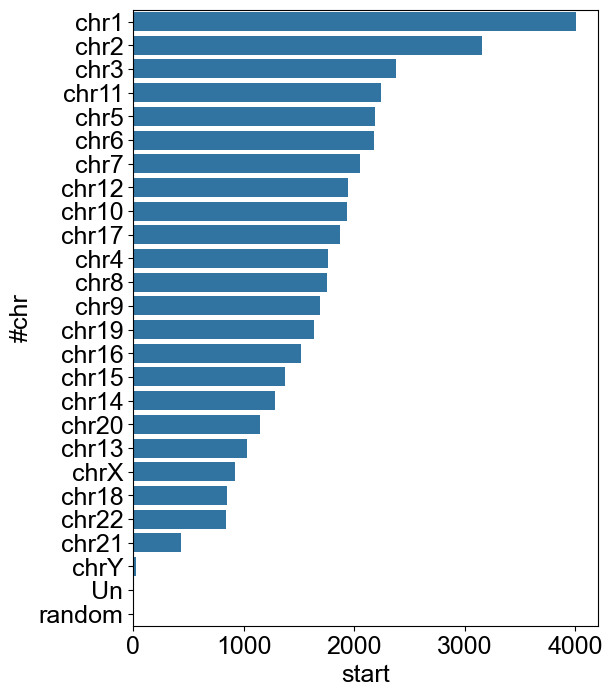

In [20]:
dfan["#chr"] = dfan["seqnames"]
dfan.loc[dfan["seqnames"].str.contains("random"), "#chr"] = "random"
dfan.loc[dfan["seqnames"].str.contains("Un"), "#chr"] = "Un"
counts = dfan.groupby("#chr")["start"].count().reset_index().sort_values(by="start", ascending=False).copy()

fig, ax=plt.subplots(figsize =(6,8))
sns.barplot(y="#chr", x="start", data=counts)
plt.savefig(os.path.join(RE, "5_deseq2.chr_count.pdf"), bbox_inches="tight")

In [21]:
dfan = dfan.loc[dfan["#chr"].str.contains("chr")]

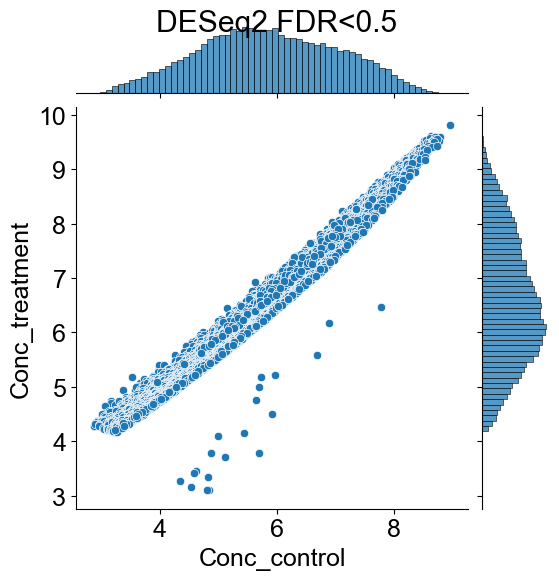

In [22]:
g = sns.jointplot(x='Conc_control', y="Conc_treatment", data=df)
g.fig.suptitle("DESeq2 FDR<0.5")
plt.savefig(os.path.join(RE, "6_deseq2.joint.pdf"), bbox_inches="tight")

In [23]:
# compute -log10p
dfan["-log10FDR"] = np.log10(dfan["FDR"]) *-1

# summary stats
dfan.describe()

,start,end,width,Conc,Conc_treatment,Conc_control,Fold,p.value,FDR,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,distanceToTSS,-log10FDR
count,4.025900e+04,4.025900e+04,40259.0,40259.000000,40259.000000,40259.000000,40259.000000,4.025900e+04,4.025900e+04,40259.000000,4.025900e+04,4.025900e+04,4.025900e+04,40259.000000,4.025900e+04,4.025900e+04,40259.000000
mean,7.697883e+07,7.697923e+07,401.0,6.309846,6.573097,5.856543,0.570873,3.869412e-03,1.133059e-02,9.604362,7.694620e+07,7.701255e+07,6.634929e+04,1.490226,2.630931e+07,4.234651e+03,2.646630
std,5.591250e+07,5.591250e+07,0.0,1.148733,1.140992,1.174669,0.107529,5.485005e-03,1.403179e-02,6.452377,5.591155e+07,5.591588e+07,1.323878e+05,0.499911,4.605924e+07,7.472499e+04,1.072394
min,1.086400e+04,1.126400e+04,401.0,3.835439,3.096639,2.876776,-1.290494,6.459160e-15,1.248904e-10,1.000000,1.155500e+04,1.378300e+04,4.400000e+01,1.000000,1.000000e+00,-1.035068e+06,1.301033
25%,3.285047e+07,3.285087e+07,401.0,5.449220,5.713988,4.997007,0.494838,3.731408e-05,3.575704e-04,4.000000,3.279168e+07,3.287446e+07,5.701000e+03,1.000000,9.569000e+03,-4.129000e+03,1.719198
50%,6.557783e+07,6.557823e+07,401.0,6.235097,6.478426,5.821076,0.561954,8.923328e-04,4.278533e-03,9.000000,6.553395e+07,6.559774e+07,2.069800e+04,1.000000,6.484800e+04,0.000000e+00,2.368705
75%,1.135760e+08,1.135764e+08,401.0,7.166326,7.415610,6.753223,0.642867,5.969946e-03,1.908981e-02,15.000000,1.135366e+08,1.135977e+08,6.719950e+04,2.000000,7.287270e+05,8.156500e+03,3.446638
max,2.489061e+08,2.489065e+08,401.0,9.502040,9.807023,8.958590,1.053665,2.084194e-02,4.999966e-02,24.000000,2.489062e+08,2.489199e+08,2.173303e+06,2.000000,1.289667e+08,1.299523e+06,9.903471


In [51]:
TOPN=5
top_sig = dfan["FDR"].sort_values().head(TOPN).index
top_fold = dfan["Fold"].abs().sort_values(ascending=False).head(TOPN).index
top_sig, top_fold

(Index([0, 1, 2, 4, 5], dtype='int64'),
 Index([18, 0, 251, 2508, 44], dtype='int64'))

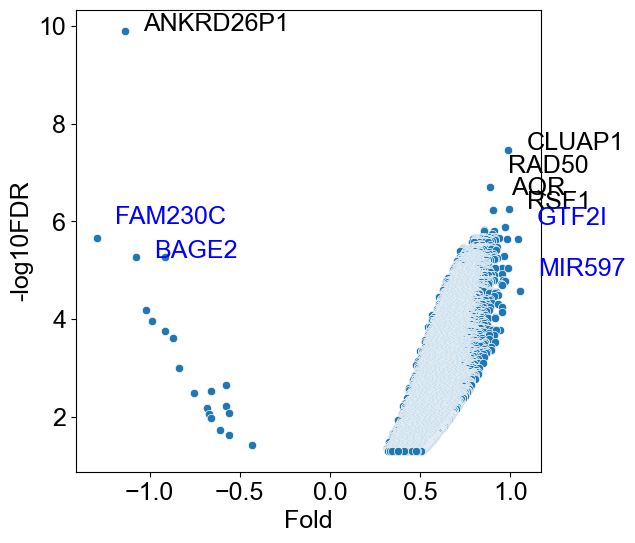

In [54]:
fig, ax= plt.subplots(figsize=(6,6))
sns.scatterplot(x="Fold", y="-log10FDR", data=dfan)
ys, genes = [], []
for i in top_sig:
    row = dfan.loc[dfan.index==i]
    x=row["Fold"].iloc[0]
    y=row["-log10FDR"].iloc[0]
    annot = row["SYMBOL"].iloc[0]
    
    if round(y,0) in ys:
        modifier = 0.3
    else:
        modifier=0
    ax.text(x+0.1,y+modifier,annot)
    ys.append(round(y,0)), genes.append(annot)
    
    
for i in top_fold:
    row = dfan.loc[dfan.index==i]
    x=row["Fold"].iloc[0]
    y=row["-log10FDR"].iloc[0]
    annot = row["SYMBOL"].iloc[0]
    if annot in genes:
        continue
    if round(y,0) in ys:
        modifier = 0.3
    else:
        modifier=0
    ax.text(x+0.1,y+modifier,annot, color="b")
    ys.append(round(y,0)), genes.append(annot)
  
plt.savefig(os.path.join(RE, "6_deseq2.volcano.pdf"), bbox_inches="tight")

In [58]:
dfan[['Conc_control', "Conc_treatment"]].corr().iloc[1, 0]

0.9919958577540695